In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv("drug200.csv")

In [3]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [12]:
data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [5]:
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [34]:
data['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

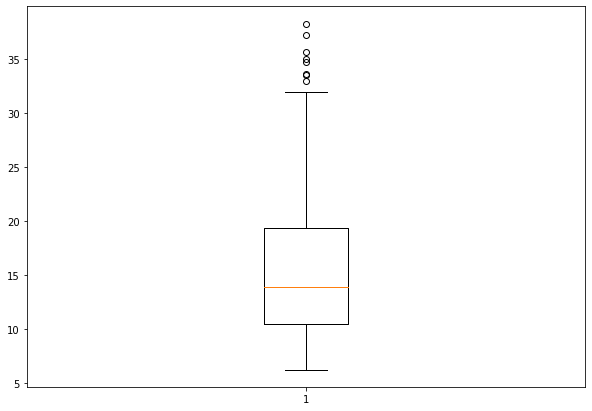

In [14]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(data['Na_to_K'])
 
# show plot
plt.show()

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [16]:
data.shape

(200, 6)

In [17]:
q1 = data.Na_to_K.quantile(.25)
q3 = data.Na_to_K.quantile(.75)

In [18]:
IQR = q3 - q1
IQR

8.9345

In [19]:
upper_limit = q3+1.5*IQR
lower_limit = q1-1.5*IQR

In [20]:
data = data[data.Na_to_K<upper_limit]

In [31]:
categorical_cols = ['Sex', 'BP', 'Cholesterol'] 
df = pd.get_dummies(data, columns = categorical_cols)

In [32]:
df

,Age,Na_to_K,Drug,Sex_0,Sex_1,BP_0,BP_1,BP_2,Cholesterol_0,Cholesterol_1
0,23,25.355,DrugY,1,0,1,0,0,1,0
1,47,13.093,drugC,0,1,0,1,0,1,0
2,47,10.114,drugC,0,1,0,1,0,1,0
3,28,7.798,drugX,1,0,0,0,1,1,0
4,61,18.043,DrugY,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
195,56,11.567,drugC,1,0,0,1,0,1,0
196,16,12.006,drugC,0,1,0,1,0,1,0
197,52,9.894,drugX,0,1,0,0,1,1,0
198,23,14.020,drugX,0,1,0,0,1,0,1


In [37]:
data['Drug'].replace(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'],
                        [0, 1,2,3,4], inplace=True)

In [67]:
x=df.drop('Drug', axis=1)
x

,Age,Na_to_K,Sex_0,Sex_1,BP_0,BP_1,BP_2,Cholesterol_0,Cholesterol_1
0,23,25.355,1,0,1,0,0,1,0
1,47,13.093,0,1,0,1,0,1,0
2,47,10.114,0,1,0,1,0,1,0
3,28,7.798,1,0,0,0,1,1,0
4,61,18.043,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
195,56,11.567,1,0,0,1,0,1,0
196,16,12.006,0,1,0,1,0,1,0
197,52,9.894,0,1,0,0,1,1,0
198,23,14.020,0,1,0,0,1,0,1


In [68]:
y=data['Drug']
y.unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=12)

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [45]:
reg_model = Sequential()
# Adding the input layer to the model
reg_model.add(Dense(4,activation='relu'))
# Adding the 1st hidden layer to the model
reg_model.add(Dense(64,activation='relu'))
# Adding the 2nd hidden layer to the model
reg_model.add(Dense(32,activation='relu'))
# Adding the 3rd hidden layer to the model
reg_model.add(Dense(32,activation='relu'))
# Adding output layer
reg_model.add(Dense(1,activation='linear'))

In [46]:
reg_model.compile(optimizer='adam',loss='mse')

In [71]:
reg_model.fit(xtrain,ytrain,batch_size=4,epochs=10)

Epoch 1/10
39/39 [==============================] - 1s 2ms/step - loss: 4.1786
Epoch 2/10
39/39 [==============================] - 0s 2ms/step - loss: 1.6627
Epoch 3/10
39/39 [==============================] - 0s 2ms/step - loss: 1.6470
Epoch 4/10
39/39 [==============================] - 0s 2ms/step - loss: 1.7058
Epoch 5/10
39/39 [==============================] - 0s 2ms/step - loss: 1.7841
Epoch 6/10
39/39 [==============================] - 0s 2ms/step - loss: 1.5639
Epoch 7/10
39/39 [==============================] - 0s 2ms/step - loss: 1.5300
Epoch 8/10
39/39 [==============================] - 0s 2ms/step - loss: 1.5079
Epoch 9/10
39/39 [==============================] - 0s 2ms/step - loss: 1.5391
Epoch 10/10
39/39 [==============================] - 0s 2ms/step - loss: 1.4427


In [72]:
ypred = reg_model.predict(xtest)

2/2 [==============================] - 0s 6ms/step
